In [2]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma.core import argmax

from far_heaa.grids_and_combinations.combination_generation import MultinaryCombinations
from far_heaa.grids_and_combinations.grid_creation import CompositionGrid
from far_heaa.io.json_handler import JSONHandler
from far_heaa.math_operations.thermo_calculations import ThermoMaths


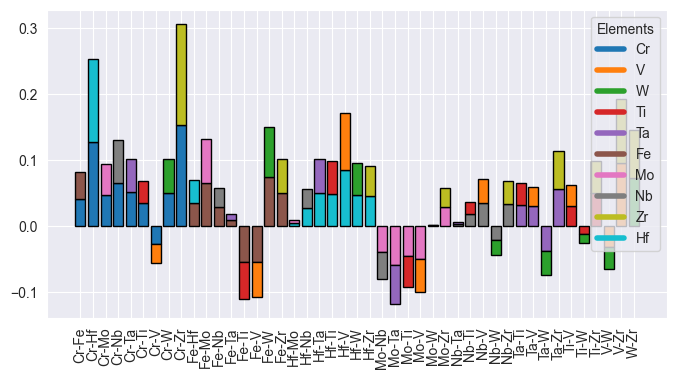

In [17]:
from far_heaa.io.text_handler import TextHandler

# element_list = TextHandler.extract_ele_list(
#                 folder_path='../database', file_name="database_element_list"
#             ) 
element_list = ['Cr', 'V', 'W', 'Ti', 'Ta', 'Fe', 'Mo', 'Nb', 'Zr', 'Hf']
data = JSONHandler.load_json(folder_path='../database', file_name='all_lattices_binaries')
mol_grid_size = 5
x = np.linspace(0, 1, mol_grid_size)
lattice = 'BCC'

# Get binaries and corresponding omega values
binaries = list(MultinaryCombinations.create_multinary(element_list=element_list, no_comb=[2]).values())[0]
omegas = [data[i][lattice] for i in binaries]
# omegas = sorted(omegas)

# Define colors for each element
element_colors = {element: plt.cm.tab20(i / len(element_list)) for i, element in enumerate(element_list)}

# Plot
fig, ax = plt.subplots(figsize=(8, 4))

# Loop to create each binary bar with two halves (bottom and top colors)
for idx, (binary, omega) in enumerate(zip(binaries, omegas)):
    element1, element2 = binary.split('-')  # Assuming binaries are in the format 'Element1-Element2'
    color1 = element_colors[element1]
    color2 = element_colors[element2]
    # Plot the bottom half of the bar with the color of the first element
    ax.bar(idx, omega / 2, color=color1, width=0.8, edgecolor='black', label=element1 if idx == 0 else "")

    # Plot the top half of the bar with the color of the second element
    ax.bar(idx, omega / 2, bottom=omega / 2, color=color2, width=0.8, edgecolor='black',
           label=element2 if idx == 0 else "")

# Set labels and rotation
ax.set_xticks(range(len(binaries)))
ax.set_xticklabels(binaries, rotation=90)

# Add legend for clarity
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in element_colors.values()]
ax.legend(handles, element_colors.keys(), title="Elements")

plt.show()

In [18]:
print(np.argmax(omegas))
print(binaries[np.argmax(omegas)])

8
Cr-Zr


Text(0, 0.5, 'Frequency')

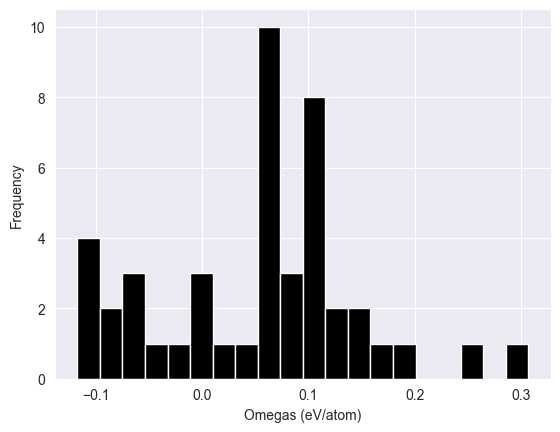

In [19]:
plt.hist(omegas, bins=20, color = 'black')
plt.xlabel('Omegas (eV/atom)')
plt.ylabel('Frequency')


In [20]:
from tqdm import tqdm
from far_heaa.io.text_handler import TextHandler

element_list = TextHandler.extract_ele_list(
                folder_path='../database', file_name="database_element_list"
            )[:30] 

hc_list = []
ha_list = []
running_count = 0
y_values = []
for n in range(3, 9):
    satisfy = 0
    total = 0
    ha_total = 0
    hc_total = 0
    n_naries = list(MultinaryCombinations.create_multinary(element_list=element_list, no_comb=[n]).values())[0]
    for alloy in tqdm(n_naries):
        ele_alloy = alloy.split('-')
        binary_pairs = list(MultinaryCombinations.create_multinary(element_list=ele_alloy, no_comb=[2]).values())[0]
        for lattice in ['BCC', 'HCP', 'FCC']:
            for element in ele_alloy:
                ha = sum([data[i][lattice] for i in binary_pairs if element in i])
                hc = sum([data[i][lattice] for i in binary_pairs if element not in i])
                ha_total += ha
                hc_total += hc
                total += 1
                # if hc <= 0 <= ha:
                #     continue
                # elif abs(hc/(ha + 1e-5)) >= 0.5 or hc >= 0 >= ha:
                #     satisfy += 1
                       
    # print(satisfy, total, satisfy/total)
    running_count += total
    # y_values.append(satisfy/total)
    print(f"Total samples in {n}-nary: {total}\n"
          f"Percentage of samples satisfying condition for decrease in mixing enthalpy: {satisfy/total}\n"
          f"Running counter for total-total samples: {running_count}")
    print(f"Total samples in {n}-nary: {total}\n"
          f"Average Ha: {ha_total/total}\n"
          f"Average Hc: {hc_total/total}\n")

100%|██████████| 4060/4060 [00:00<00:00, 76550.44it/s]


Total samples in 3-nary: 36540
Percentage of samples satisfying condition for decrease in mixing enthalpy: 0.0
Running counter for total-total samples: 36540
Total samples in 3-nary: 36540
Average Ha: -0.3502101149425295
Average Hc: -0.1751050574712616



100%|██████████| 27405/27405 [00:00<00:00, 45200.99it/s]


Total samples in 4-nary: 328860
Percentage of samples satisfying condition for decrease in mixing enthalpy: 0.0
Running counter for total-total samples: 365400
Total samples in 4-nary: 328860
Average Ha: -0.5253151724137898
Average Hc: -0.5253151724137619



100%|██████████| 142506/142506 [00:04<00:00, 29594.10it/s]


Total samples in 5-nary: 2137590
Percentage of samples satisfying condition for decrease in mixing enthalpy: 0.0
Running counter for total-total samples: 2502990
Total samples in 5-nary: 2137590
Average Ha: -0.700420229885098
Average Hc: -1.0506303448274363



100%|██████████| 593775/593775 [00:30<00:00, 19215.65it/s]


Total samples in 6-nary: 10687950
Percentage of samples satisfying condition for decrease in mixing enthalpy: 0.0
Running counter for total-total samples: 13190940
Total samples in 6-nary: 10687950
Average Ha: -0.8755252873563788
Average Hc: -1.751050574712909



100%|██████████| 2035800/2035800 [02:34<00:00, 13141.58it/s]


Total samples in 7-nary: 42751800
Percentage of samples satisfying condition for decrease in mixing enthalpy: 0.0
Running counter for total-total samples: 55942740
Total samples in 7-nary: 42751800
Average Ha: -1.0506303448271528
Average Hc: -2.626575862070013



100%|██████████| 5852925/5852925 [10:23<00:00, 9391.71it/s]

Total samples in 8-nary: 140470200
Percentage of samples satisfying condition for decrease in mixing enthalpy: 0.0
Running counter for total-total samples: 196412940
Total samples in 8-nary: 140470200
Average Ha: -1.2257354022989082
Average Hc: -3.6772062068885734



-1.1573912350174076 -3.3039487601987934
-0.7868333333333334 -1.6318333333333335


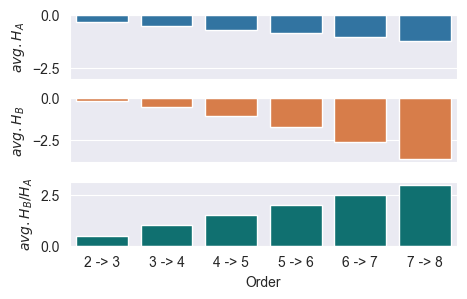

In [3]:
x = [f'{i} -> {i+1}' for i in range(2, 8)]
# y_values = [0.56, 0.64, 0.66, 0.66, 0.66, 0.66]
ha = np.array([-0.350, -0.525, -0.70, -0.876, -1.05, -1.22])
hc = np.array([-0.170, -0.525, -1.05, -1.75, -2.626, -3.67])
total = np.array([36540, 365400, 2137590, 10687950, 42751800, 140470200])
print(np.sum(ha*total)/196412940, np.sum(hc*total)/196412940 )
print(np.mean(ha), np.mean(hc) )
# plt.bar(x, y_values)
# plt.axhline(y=0.66, c = 'black')

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(5
                                                   , 3))

import matplotlib
matplotlib.rcParams['font.family'] = 'helvetica'
matplotlib.rcParams['font.weight'] = 'normal'
matplotlib.rcParams['font.size'] = 12
# Plot data
sns.barplot(x=x, y=ha, ax=ax[0], color="#1f77b4")  # Default Seaborn blue
sns.barplot(x=x, y=hc, ax=ax[1], color="#EE7733")  # Orange
sns.barplot(x=x, y=[i / j for i, j in zip(hc, ha)], ax=ax[2], color="#008080")  # Teal

# Set labels
ax[0].set_ylabel('$avg. H_A$')
ax[1].set_ylabel('$avg. H_B$')
ax[2].set_ylabel('$avg. H_B/H_A$')
ax[2].set_xticks(x)
ax[0].set_ylim(-3, 0)
plt.xlabel('Order')

# Adjust spacing
plt.subplots_adjust(hspace=0.3, wspace=0.0)

# Save the plot
plt.savefig('/Users/pravanomprakash/Documents/Projects/mixing-enthalpy/far_heaa/src/far_heaa/high_throughput/sampling.png', facecolor='white', bbox_inches='tight', transparent=True)

plt.show()



Text(0, 0.5, '$\\delta H$ (ev/atom)')

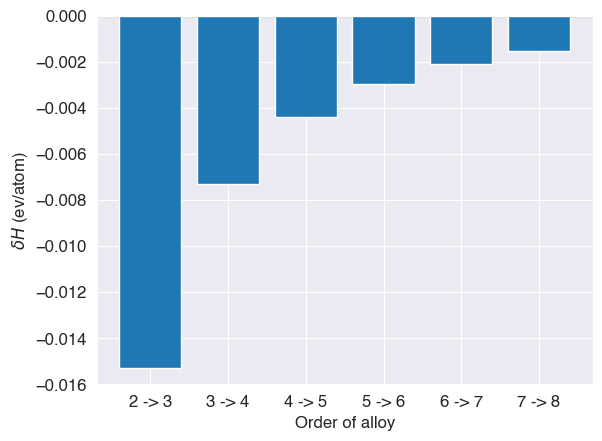

In [25]:
# fig, ax = plt.subplots(3, 1, sharex=True, sharey=True)
x = [f'{i} -> {i+1}' for i in range(2, 8)]
n = np.array([2, 3, 4, 5, 6, 7])
low_entropy = -0.5
mid_entropy = -1
high_entropy = -2.5
ratios = np.array([low_entropy, mid_entropy, high_entropy, high_entropy, high_entropy, high_entropy])
ha = np.array([-0.350, -0.525, -0.70, -0.876, -1.05, -1.22])
hc = np.array([-0.170, -0.525, -1.05, -1.75, -2.626, -3.67])
delta_hn = 1/(n*(n+1))**2
delta_hn *= ((-2*n-1)*hc + n*n*ha)
delta_sn = 8.314e-5*np.log(n/(n-1))
# print(hc)
# T = np.array([500, 1000, 1500, 2000, 2500])
# for idx in range(3):
#     ax[idx].plot(T, [delta_hn[idx]]*len(T), color='orange', marker = 'o')
#     ax[idx].plot(T, -T*delta_sn[idx], color='blue', marker = 'o')
#     ax[idx].plot(T, np.array([delta_hn[idx]])*len(T)-T*delta_sn[idx], color='black', marker = 'o')
#     ax[idx].set_ylabel('Energy (ev/atom)')
# ax[2].set_xlabel('T (K)')
# plt.subplots_adjust(hspace=0.1, wspace=0.0)
plt.bar(n, delta_hn)
plt.axhline(0, color='black')
plt.xlabel('Order of alloy')
plt.xticks(n, x)
plt.ylabel('$\delta H$ (ev/atom)')

Text(0.5, 0, 'Mole fraction of alloying agent')

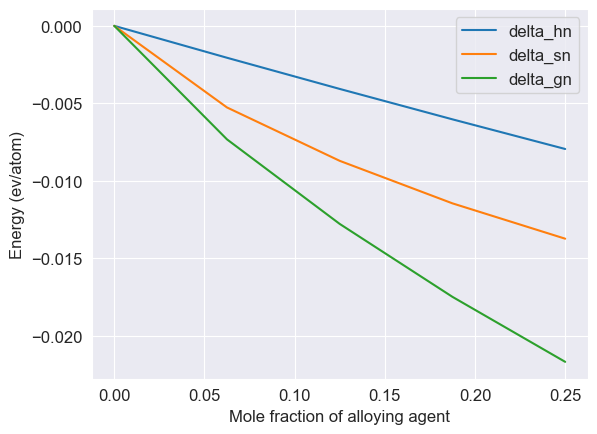

In [22]:
 `x = np.linspace(0, 1, 5)/4
delta_hn = x/(12)**2
delta_hn *= ((x - 8)*0.3 + (4-x)*-0.6)
delta_sn = -8.314e-5/4
delta_sn *= ((4 - x)*np.log((4 - x)/12) + x*np.log(x/4 + 1e-7) + 4*np.log(3))
temperature = 1000
delta_gn = delta_hn - temperature*delta_sn
plt.plot(x, delta_hn)
plt.plot(x, -temperature*delta_sn)
plt.plot(x, delta_gn)
plt.legend(['delta_hn', 'delta_sn', 'delta_gn'])
plt.ylabel('Energy (ev/atom)')
plt.xlabel('Mole fraction of alloying agent')

In [104]:
import numpy as np
import itertools
def compute_plane_4d(*points):
    n = len(points[0])  # Dimensionality of the space
    if len(points) != n - 1:
        raise ValueError("Number of points must be n-1 for an n-dimensional hyperplane.")
    
    # Compute vectors spanning the hyperplane
    base_point = points[0]
    vectors = [point - base_point for point in points[1:]]
    
    # Stack the vectors into a matrix
    matrix = np.stack(vectors)
    
    # Find the null space of the matrix (normal vector to the hyperplane)
    u, s, vh = np.linalg.svd(matrix, full_matrices=True)
    normal_vector = vh[-1]  # The last row of V^H is the null space
    
    # Compute the constant term d for the hyperplane equation
    d = -np.dot(normal_vector, base_point)
    
    return normal_vector, d

def compute_energy_from_plane(normal_vector, d, mol_fractions):
    """
    Compute the energy (E) from a plane equation given mol fractions.

    Parameters:
        normal_vector (numpy array): The normal vector of the plane [n_x, n_y, ..., n_E].
        d (float): The constant term in the hyperplane equation.
        mol_fractions (numpy array): The mol fractions [x, y, z, ...].
    
    Returns:
        float: The energy (E) calculated from the plane.
    """
    # Extract the coefficients for the mol fractions (all except the last)
    mol_fraction_coeffs = normal_vector[:-1]
    
    # Coefficient for energy
    energy_coeff = normal_vector[-1]
    
    # Calculate energy using the hyperplane equation
    numerator = - (np.dot(mol_fraction_coeffs, mol_fractions) + d)
    energy = numerator / energy_coeff
    
    return energy

n=4
mol_n_list = []
for i in range(n):
    temp = np.ones(n+1)
    temp[i] = 0
    mol_n_list.append(temp/n)

mol_n_list = np.array(mol_n_list)

element_list = ['Cr', 'Ti', 'V', 'W', 'Ta']
binary_pairs = list(MultinaryCombinations.create_multinary(element_list=element_list, no_comb=[2]).values())[0]
H_full = np.array([data[i]['HCP'] for i in binary_pairs])
realign_vectors = []
for i in mol_n_list:
    mol_comb = np.array(list(itertools.combinations(i, r = 2)))
    comp_product = mol_comb[:,0]*mol_comb[:,1]
    H_c_all = np.sum(comp_product*H_full)
    vector = np.append(i[:-1], H_c_all)
    realign_vectors.append(vector)

total_vector = np.array([1/(n+1)]*(n+1))
mol_comb = np.array(list(itertools.combinations(total_vector, r = 2)))
comp_product = mol_comb[:,0]*mol_comb[:,1]
H_c_all = np.sum(comp_product*H_full)
total_vector = np.append(total_vector[:-1], H_c_all)
# print(total_vector, realign_vectors)


normal_vec, d = compute_plane_4d(*realign_vectors)
# plane_energy = compute_energy_from_plane(normal_vec, d, np.array([1/(n+1)]*(n)))
plane_energy = compute_energy_from_plane(normal_vec, d, np.array([1/(n+1)]*(n)))
print(total_vector[-1] - plane_energy)



0.0006955967450979761


In [89]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 5, 6, 4])
print(a.shape)
# Calculate the cross product
c = np.cross(a, b)

print(c)

(4,)


ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)